 ## Primer punto
 
 Las columnas de la matriz deben ser independientes. De este modo es posible dar una aproximación por medio de una pseudoinversa.

In [17]:

using CSV
using DataFrames

In [18]:
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

In [19]:
dataBitcoin.Date

29-element Vector{String15}:
 "Mar 07, 2022"
 "Mar 06, 2022"
 "Mar 05, 2022"
 "Mar 04, 2022"
 "Mar 03, 2022"
 "Mar 02, 2022"
 "Mar 01, 2022"
 "Feb 28, 2022"
 "Feb 27, 2022"
 "Feb 26, 2022"
 "Feb 25, 2022"
 "Feb 24, 2022"
 "Feb 23, 2022"
 ⋮
 "Feb 18, 2022"
 "Feb 17, 2022"
 "Feb 16, 2022"
 "Feb 15, 2022"
 "Feb 14, 2022"
 "Feb 13, 2022"
 "Feb 12, 2022"
 "Feb 11, 2022"
 "Feb 10, 2022"
 "Feb 09, 2022"
 "Feb 08, 2022"
 "Feb 07, 2022"


(process:11048): GLib-GIO-WARNING **: 12:13:34.494: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.15.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


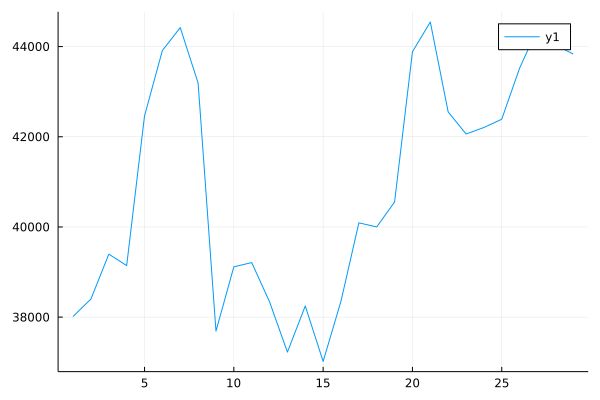

In [20]:
using Plots

plot(dataBitcoin.PriceFloat)

In [21]:
N = size(dataBitcoin.PriceFloat,1);
A = Array((1:N));
b = reverse(Array(dataBitcoin.PriceFloat));
A = [ones(N,1) A];
println(A)
println(b)

[1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0; 1.0 5.0; 1.0 6.0; 1.0 7.0; 1.0 8.0; 1.0 9.0; 1.0 10.0; 1.0 11.0; 1.0 12.0; 1.0 13.0; 1.0 14.0; 1.0 15.0; 1.0 16.0; 1.0 17.0; 1.0 18.0; 1.0 19.0; 1.0 20.0; 1.0 21.0; 1.0 22.0; 1.0 23.0; 1.0 24.0; 1.0 25.0; 1.0 26.0; 1.0 27.0; 1.0 28.0; 1.0 29.0]
[43833.9, 44038.2, 44388.9, 43521.0, 42388.4, 42205.2, 42061.1, 42550.3, 44544.4, 43883.6, 40552.8, 40000.1, 40090.3, 38355.0, 37017.7, 38248.2, 37224.6, 38339.2, 39209.6, 39115.5, 37689.1, 43188.2, 44420.3, 43912.8, 42463.0, 39142.7, 39395.8, 38403.1, 38014.8]


In [23]:
using Plots

function f(x,y) 
    sum((A[:,1]*x+A[:,2]*y-b)*transpose((A[:,1]*x+A[:,2]*y-b)))
end
plotlyjs()
surface(-50000:1000:50000,-10000:100:15000, f)

WebIO._IJuliaInit()